In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None

## Preguntas propuestas
Ve qués se cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. Ver también diferencias entre géneros. Mujeres y hombres trabajando en el sector (con un quesito). Años de experiencia por géneros, ver si las mujeres se han ido incorporando más a este mercado o no. Ver nivel de estudios en relación con el puesto que ocupa Y los años experiencia.

Estudio de mercado: Las personas que trabajan de estos puestos: tamaño empresa, industria... 
Machine learning: Cuánto invierten realmente en *Machine Learning*.

Qué herramientas utilizan (realizar para todas las columnas).

Hacer un filtro:

.isin(): puestos - data analyst y business intelligence. Ver todas las herramientas de manera general. Hacerlo con **todas**. 
Filtro por género para buscar por mujeres. 
- Un dataframe para ver las herramientas: 
    - cómo varían las herramientas según los años de experiencia.


Brecha salarial para mujeres y hombres en el mismo puesto. A tener en cuenta: mismos años, mismo puesto... ver si hay diferencia de salario real.

Años de las mujeres que estén trabajando en el sector, para ver si hay edades que trabajen menos por cuestiones de maternidad, etc. 


¿Qué tipo de gráficas vamos a querer?

- Graficas que hay:
    - Barras. Las barras apiladas para poder los años de experiencia que tienen los hombres vs. mujeres, para comprobar si los hombres se mantienen en el sector más o menos que las mujeres.
    - Dispersión. Quizá para ver la brecha salarial entre géneros, u otras cosas. 
    - Histogramas. Por ejemplo, para ver las edades, para las herramientas...
    - Sectores(quesitos): Géneros en el sector. 
    - Violín. No vemos utilidad.
    - De caja. No vemos utilidad. 

In [ ]:
def quitar_espacios(elemento):
    '''
    Esta función recoge elemento a elemento de una columna, quita los espacios de los lados y
    devuelve el string modificado'''
    try:
        return elemento.strip()
    except:
        return np.nan

In [ ]:
def explode_strip(dataframe,columna):
    ''' 
    Esta función recoge el dataframe y la columna a modificar. Hace un explode de esa columna y quita los espacios de cada elemento.
    Devuelve el dataframe modificado.'''
    dataframe2 = dataframe.explode(columna)
    dataframe2[columna] = dataframe2[columna].apply(quitar_espacios)
    return dataframe2

## Importante

- Crear el Dataframe sólo con los países de Europa.
- Quedarnos únicamente con Data Analyst y con Business Intelligence 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('archivos_resultantes/columnas_unificadas.csv',index_col=0)
df.head(1)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q28,Q10,Q18,Q19,Q27-A,Q29-A,Q30-A,Q31-A,Q36-A,Q37-A,Q38-A,Q39,Q40,Q42,Q27-B,Q29-B,Q30-B,Q31-B,Q32-B,Q34-B,Q36-B,Q37-B,Q38-B
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,NaN,Colab Notebooks,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Google Cloud Platform (GCP),Google Cloud Compute Engine,Google Cloud Storage (GCS),No / None,No / None,NaN,No / None,"GitHub , Kaggle","Coursera, edX, Kaggle Learn Courses, DataCamp,...","Email newsletters (Data Elixir, O'Reilly Data ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_puestos = df[df["Q5"].isin(['Data Analyst','Business Analyst'])]
df_final = df_puestos[df_puestos["Q3"].isin(['Spain','France','Russia','Italy','Ukraine','Portugal','Greece','Ireland','Switzerland','Belgium','Belarus','Czech Republic','Romania','Austria', 'Poland','Denmark','Norway','United Kingdom of Great Britain and Northern Ireland','Germany','Turkey','Netherlands','Sweden'])]
df_final.head(1)

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q28,Q10,Q18,Q19,Q27-A,Q29-A,Q30-A,Q31-A,Q36-A,Q37-A,Q38-A,Q39,Q40,Q42,Q27-B,Q29-B,Q30-B,Q31-B,Q32-B,Q34-B,Q36-B,Q37-B,Q38-B
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,Energy/Mining,"1000-9,999 employees",5-9,We are exploring ML methods (and may one day p...,"2,000-2,999",$0 ($USD),NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,NaN,NaN,"Kaggle Notebooks, Colab Notebooks, Databrick...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera, Kaggle Learn Courses, Cloud-certific...","Kaggle (notebooks, forums, etc), Blogs (Toward...",IBM Cloud / Red Hat,NaN,NaN,Databricks,Microsoft Azure SQL Database,"Microsoft Power BI, Google Data Studio, Tablea...","Automated data augmentation (e.g. imgaug, albu...","Google Cloud AutoML , H2O Driverless AI , ...","Neptune.ai , Weights & Biases , Comet.ml , ..."


In [4]:
nulos = pd.DataFrame(df.isnull().sum() * 100 / df.shape[0]).T
nulos

,time,age,gender,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q28,Q10,Q18,Q19,Q27-A,Q29-A,Q30-A,Q31-A,Q36-A,Q37-A,Q38-A,Q39,Q40,Q42,Q27-B,Q29-B,Q30-B,Q31-B,Q32-B,Q34-B,Q36-B,Q37-B,Q38-B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.404574,5.82143,6.044739,8.543487,37.146267,37.431179,37.912448,38.582374,40.742309,41.543141,82.073692,91.38721,28.814538,3.973357,4.000308,5.355562,7.711855,24.444616,25.634313,39.802872,63.485158,63.812421,87.960574,32.098718,76.610326,85.196165,72.925731,75.998152,76.171409,63.146344,64.135833,88.6151,64.436145,64.536249,32.826397,33.307666,56.662688,63.954876,100.0,65.837601,59.261541,65.494937,68.251646,74.465791,75.570785


In [5]:
df.shape

(25973, 52)

In [4]:
df_final['Q20'].value_counts()

Q20
Accounting/Finance                        106
Computers/Technology                       48
Academics/Education                        44
Retail/Sales                               42
Government/Public Service                  38
Manufacturing/Fabrication                  34
Marketing/CRM                              29
Other                                      29
Shipping/Transportation                    25
Energy/Mining                              24
Medical/Pharmaceutical                     23
Online Service/Internet-based Services     22
Broadcasting/Communications                21
Online Business/Internet-based Sales       18
Insurance/Risk Assessment                  15
Hospitality/Entertainment/Sports           11
Non-profit/Service                          6
Military/Security/Defense                   3
Name: count, dtype: int64

In [5]:
df_final['Q25'].value_counts()


Q25
$0-999             55
40,000-49,999      48
50,000-59,999      43
1,000-1,999        41
30,000-39,999      41
10,000-14,999      39
60,000-69,999      33
20,000-24,999      30
25,000-29,999      24
15,000-19,999      23
2,000-2,999        18
100,000-124,999    16
7,500-9,999        16
5,000-7,499        12
125,000-149,999    11
3,000-3,999        11
70,000-79,999      11
80,000-89,999       9
90,000-99,999       7
4,000-4,999         5
>$1,000,000         3
200,000-249,999     2
250,000-299,999     1
150,000-199,999     1
Name: count, dtype: int64

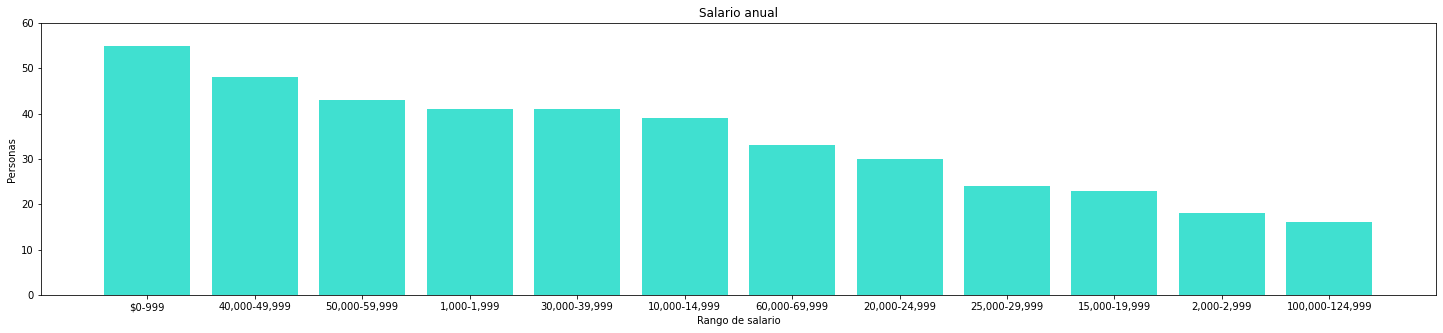

In [6]:
plt.figure(figsize = (25,5))
plt.bar(df_final['Q25'].value_counts()[:12].index,df_final['Q25'].value_counts()[:12],color='turquoise')
plt.title('Salario anual')
plt.xlabel('Rango de salario')
plt.ylabel('Personas')
plt.ylim(0, 60)
plt.show()

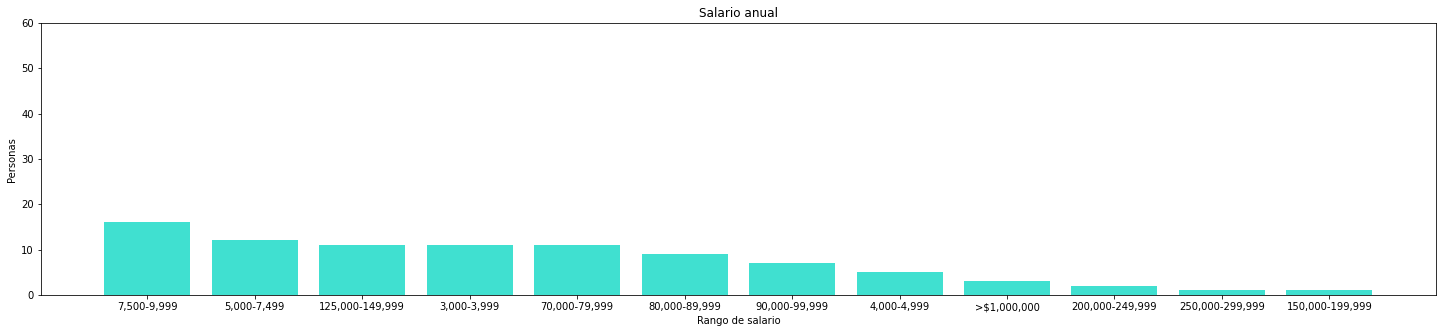

In [7]:
plt.figure(figsize = (25,5))
plt.bar(df_final['Q25'].value_counts()[12:].index,df_final['Q25'].value_counts()[12:],color='turquoise')
plt.title('Salario anual')
plt.xlabel('Rango de salario')
plt.ylabel('Personas')
plt.ylim(0, 60)
plt.show()

In [8]:
df_final['Q6'].value_counts()

Q6
1-3 years                    162
< 1 years                    141
3-5 years                     84
5-10 years                    52
10-20 years                   50
20+ years                     41
I have never written code     27
Name: count, dtype: int64

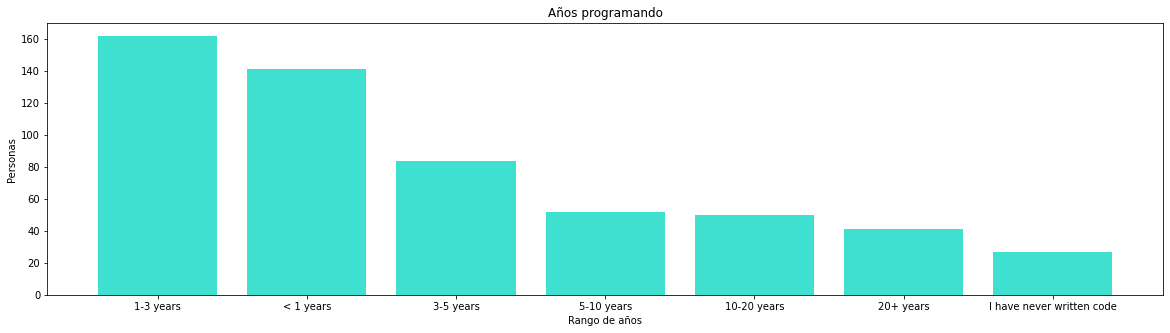

In [9]:
plt.figure(figsize = (20,5))
plt.bar(df_final['Q6'].value_counts().index,df_final['Q6'].value_counts(),color='turquoise')
plt.title('Años programando')
plt.xlabel('Rango de años')
plt.ylabel('Personas')
plt.show()

In [10]:
df_final['gender'].value_counts()

gender
Man                        436
Woman                      114
Prefer not to say            4
Prefer to self-describe      2
Nonbinary                    1
Name: count, dtype: int64

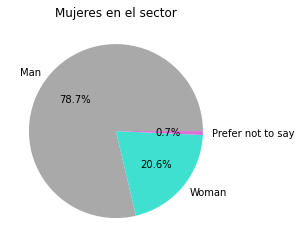

In [11]:
# Gráfico que representa la brecha de género en el sector IT, concretamente en el que trabaja Adalab.
plt.figure()
plt.pie(df_final['gender'].value_counts()[:3],labels= df_final['gender'].value_counts().index[:3],autopct='%1.1f%%',  colors = ['darkgrey','turquoise','orchid']);
plt.title('Mujeres en el sector');

In [12]:
df_final.groupby(['Q5'])['Q6'].value_counts()

Q5                Q6                       
Business Analyst  < 1 years                     56
                  1-3 years                     40
                  3-5 years                     27
                  5-10 years                    19
                  20+ years                     17
                  I have never written code     15
                  10-20 years                   12
Data Analyst      1-3 years                    122
                  < 1 years                     85
                  3-5 years                     57
                  10-20 years                   38
                  5-10 years                    33
                  20+ years                     24
                  I have never written code     12
Name: count, dtype: int64

In [13]:
df_final.groupby(['gender'])['Q6'].value_counts()

gender                   Q6                       
Man                      1-3 years                    128
                         < 1 years                    106
                         3-5 years                     68
                         5-10 years                    40
                         20+ years                     39
                         10-20 years                   37
                         I have never written code     18
Nonbinary                < 1 years                      1
Prefer not to say        < 1 years                      1
                         10-20 years                    1
                         1-3 years                      1
                         3-5 years                      1
Prefer to self-describe  10-20 years                    1
                         1-3 years                      1
Woman                    < 1 years                     33
                         1-3 years                     32
                     

In [14]:
df_final.groupby(['gender'])['Q5'].value_counts()

gender                   Q5              
Man                      Data Analyst        286
                         Business Analyst    150
Nonbinary                Data Analyst          1
Prefer not to say        Data Analyst          3
                         Business Analyst      1
Prefer to self-describe  Business Analyst      1
                         Data Analyst          1
Woman                    Data Analyst         80
                         Business Analyst     34
Name: count, dtype: int64

In [15]:
df_final.groupby(['Q5'])['Q6'].value_counts()

Q5                Q6                       
Business Analyst  < 1 years                     56
                  1-3 years                     40
                  3-5 years                     27
                  5-10 years                    19
                  20+ years                     17
                  I have never written code     15
                  10-20 years                   12
Data Analyst      1-3 years                    122
                  < 1 years                     85
                  3-5 years                     57
                  10-20 years                   38
                  5-10 years                    33
                  20+ years                     24
                  I have never written code     12
Name: count, dtype: int64

In [16]:
empresas = df_final.groupby(['Q20'])['Q5'].count().sort_values(ascending=False)
df_empresa = pd.DataFrame(empresas).reset_index()
df_empresa

,Q20,Q5
0,Accounting/Finance,106
1,Computers/Technology,48
2,Academics/Education,44
3,Retail/Sales,42
4,Government/Public Service,38
5,Manufacturing/Fabrication,34
6,Other,29
7,Marketing/CRM,29
8,Shipping/Transportation,25
9,Energy/Mining,24


In [17]:
ML= df_final.groupby(['Q20'])['Q26'].value_counts()
Df_ml = pd.DataFrame(ML).reset_index()
Df_ml

,Q20,Q26,count
0,Academics/Education,$0 ($USD),17
1,Academics/Education,$100-$999,8
2,Academics/Education,"$1000-$9,999",6
3,Academics/Education,$1-$99,4
4,Academics/Education,"$10,000-$99,999",4
...,...,...,...
85,Shipping/Transportation,$0 ($USD),13
86,Shipping/Transportation,$100-$999,5
87,Shipping/Transportation,$1-$99,3
88,Shipping/Transportation,"$100,000 or more ($USD)",2


In [18]:
salario_genero= df_final.groupby(['gender'])['Q25'].value_counts()
df_salario_genero = pd.DataFrame(salario_genero).reset_index()
df_salario_genero.head(1)

,gender,Q25,count
0,Man,$0-999,42


(array([3099., 1860.,    0., 7874.,    0., 5881., 4061.,    0., 2166.,
        1032.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

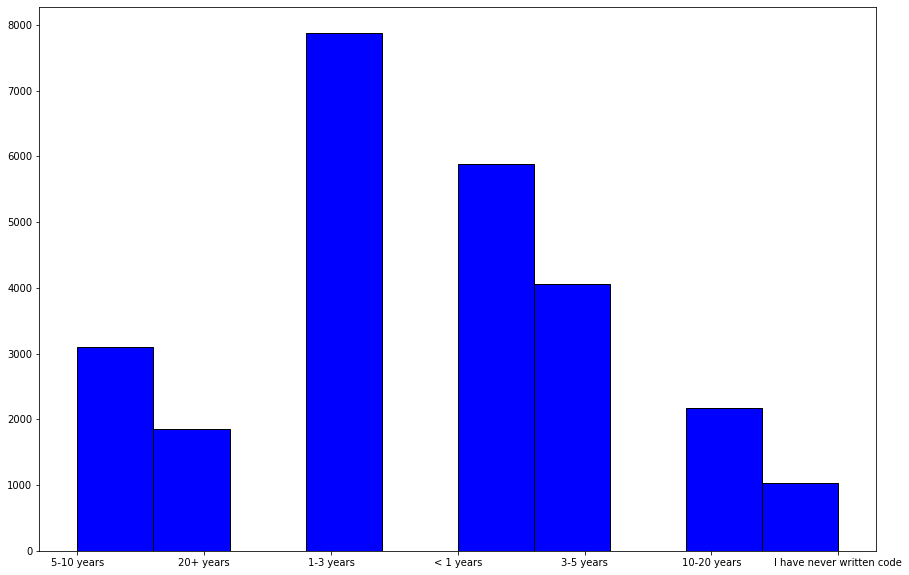

In [19]:
plt.figure(figsize = (15, 10))

plt.hist(df["Q6"], facecolor = "b", edgecolor = "black", bins = 10)

In [ ]:
paises = pd.DataFrame(df.Q3.value_counts())
paises.head(2) # Para ver los países de los que vienen los datos

In [ ]:
años_experiencia = pd.DataFrame(df.Q6.value_counts())
años_experiencia

In [ ]:
salario = pd.DataFrame(df.Q25.value_counts())
salario.sample(2)

# Para ver qué cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. 

In [ ]:
df["gender"].value_counts()
#Esto lo vamos a poner tal cual. La diferencia entre hombres y mujeres es abismal. 